# import Libraries

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier 
from xgboost import XGBClassifier


from sklearn.model_selection import KFold ,cross_val_score ,train_test_split


from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

import warnings
warnings.filterwarnings('ignore')

# Loading data

In [2]:
data = pd.read_csv(r"C:\Users\COMPUMARTS\Downloads\New folder\heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
data.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
188,60.667,1,151,1,40,1,201000.00,1.00,136,0,0,172,0
176,69.000,0,1419,0,40,0,105000.00,1.00,135,1,1,147,0
71,58.000,0,582,1,35,0,122000.00,0.90,139,1,1,71,0
63,45.000,0,582,0,35,0,385000.00,1.00,145,1,0,61,1
41,50.000,0,124,1,30,1,153000.00,1.20,136,0,1,32,1
76,70.000,0,92,0,60,1,317000.00,0.80,140,0,1,74,0
132,46.000,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
221,65.000,0,118,0,50,0,194000.00,1.10,145,1,1,200,0
281,70.000,0,582,0,40,0,51000.00,2.70,136,1,1,250,0


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
data.describe().style.background_gradient(cmap="hot")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.034510,4.412477,0.478136,0.467670,77.614208,0.467670
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [11]:
for col in data:
    print(f"{col} has {data[col].unique()}\n")

age has [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]

anaemia has [0 1]

creatinine_phosphokinase has [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  

In [12]:
groupping = data.groupby(["serum_sodium"])[["creatinine_phosphokinase", "ejection_fraction", "smoking", "anaemia", "DEATH_EVENT"]].max().sort_values(by="creatinine_phosphokinase", ascending=False).nlargest(columns=["creatinine_phosphokinase"], n=30)
groupping

,creatinine_phosphokinase,ejection_fraction,smoking,anaemia,DEATH_EVENT
serum_sodium,,,,,
136,7861,60,1,1,1
139,7702,60,1,1,1
132,5882,60,1,1,1
140,5209,62,1,1,1
137,4540,80,1,1,1
146,3964,62,0,0,1
142,2334,60,1,1,1
141,2281,60,1,1,1
138,2060,65,1,1,1


In [13]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# visualization

In [14]:
list = ["anaemia", "smoking", "diabetes", "DEATH_EVENT"]
pallet = ["#c80064", "#7f00c2", "#000dde", "#8ee106"]

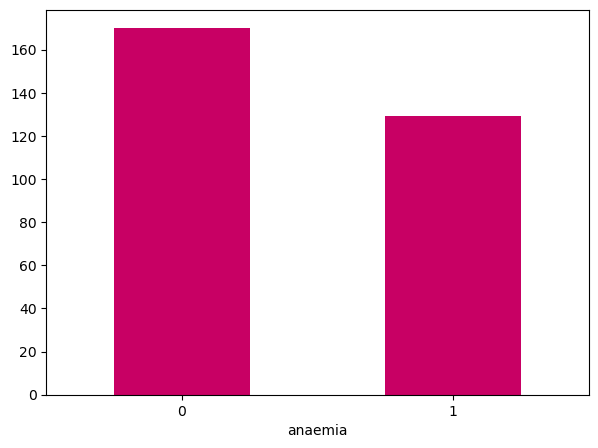

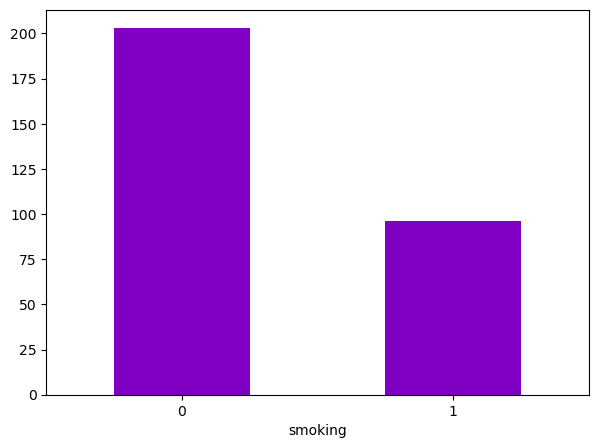

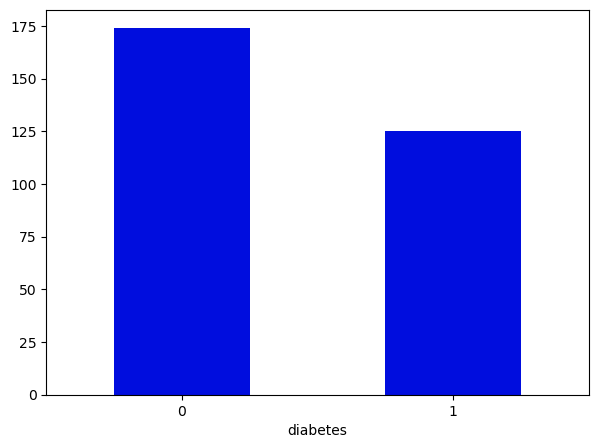

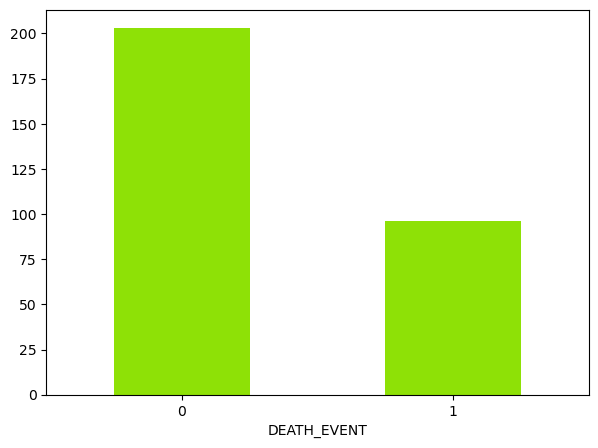

In [15]:
def value_counts(feature, color):
    plt.figure(figsize=(7,5))
    data[feature].value_counts().plot(kind="bar", color=color)
    plt.xticks(rotation=0)
    plt.show()
for i, j in zip(list, pallet):
    value_counts(i, j)

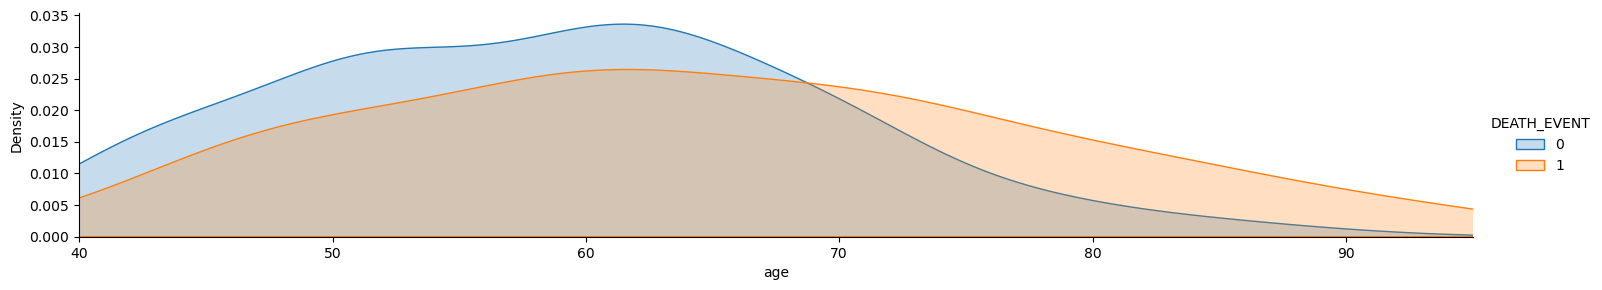

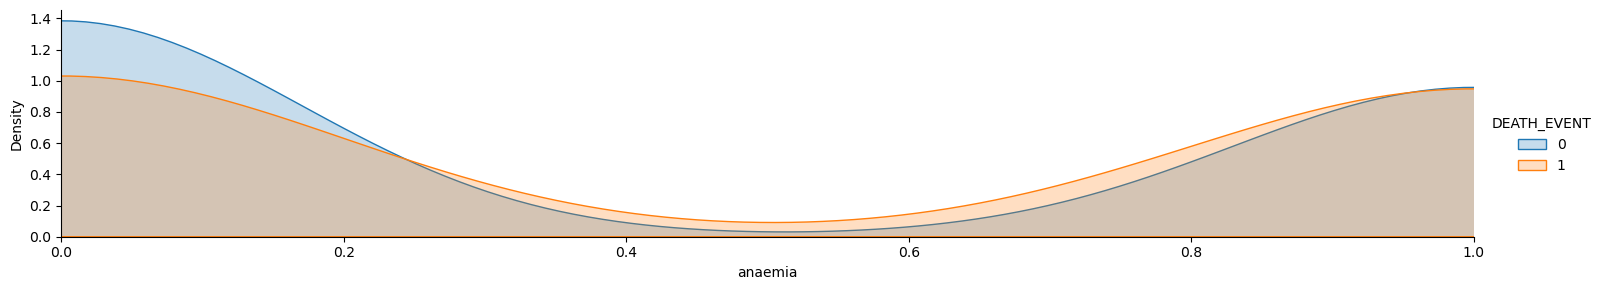

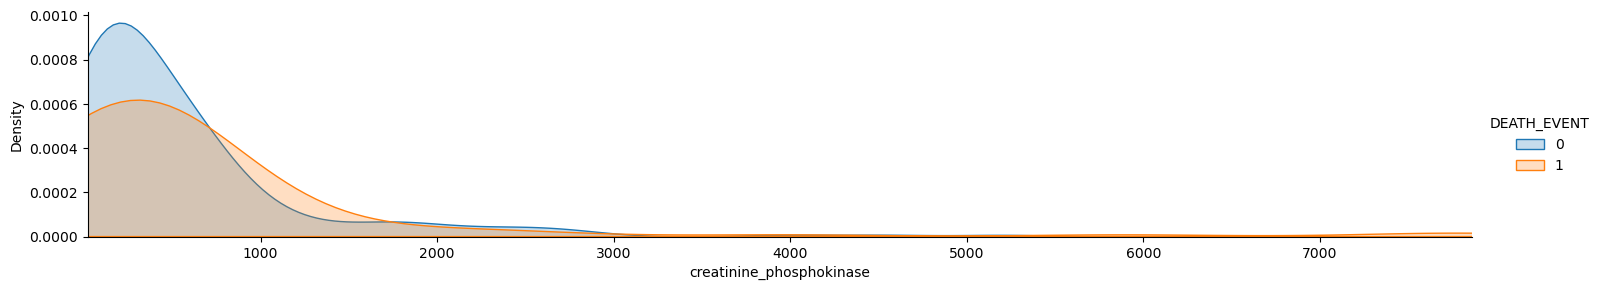

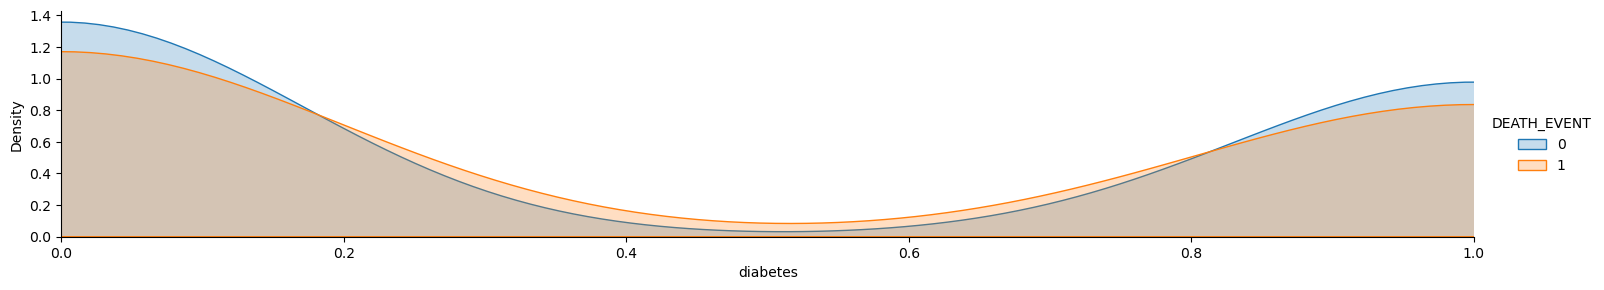

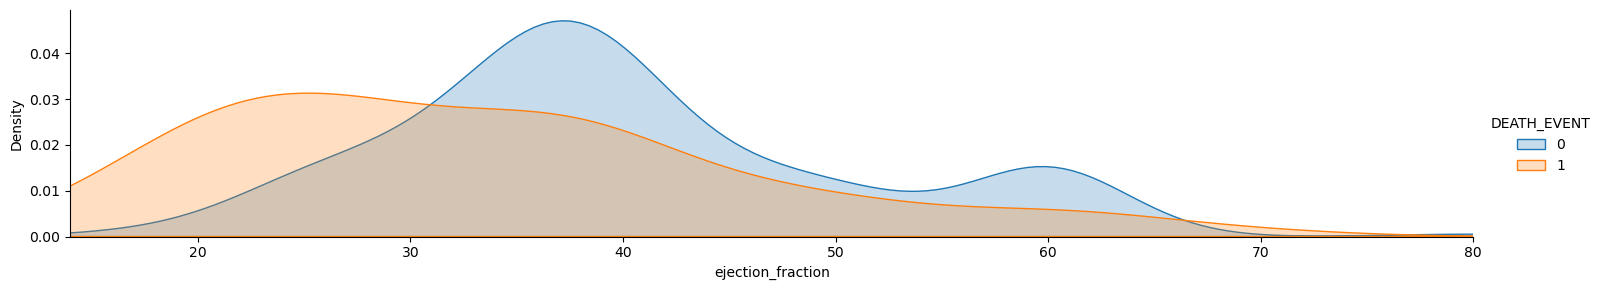

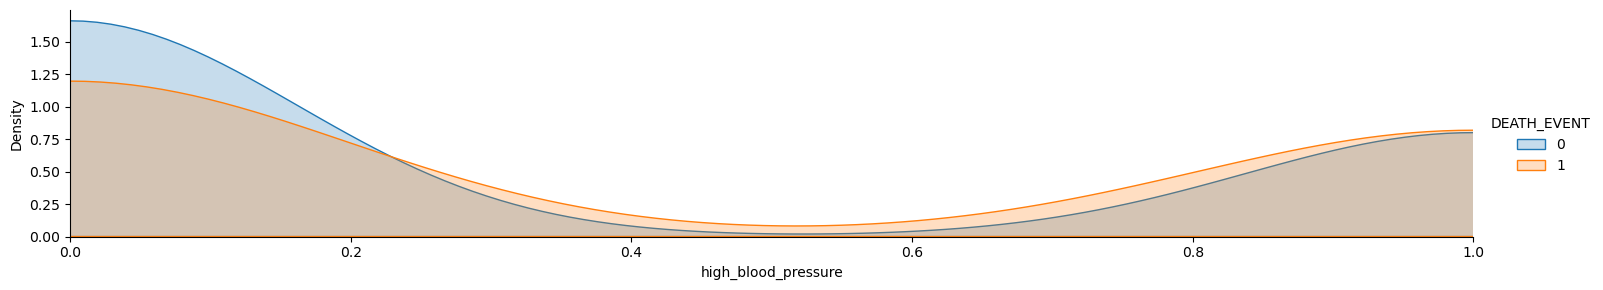

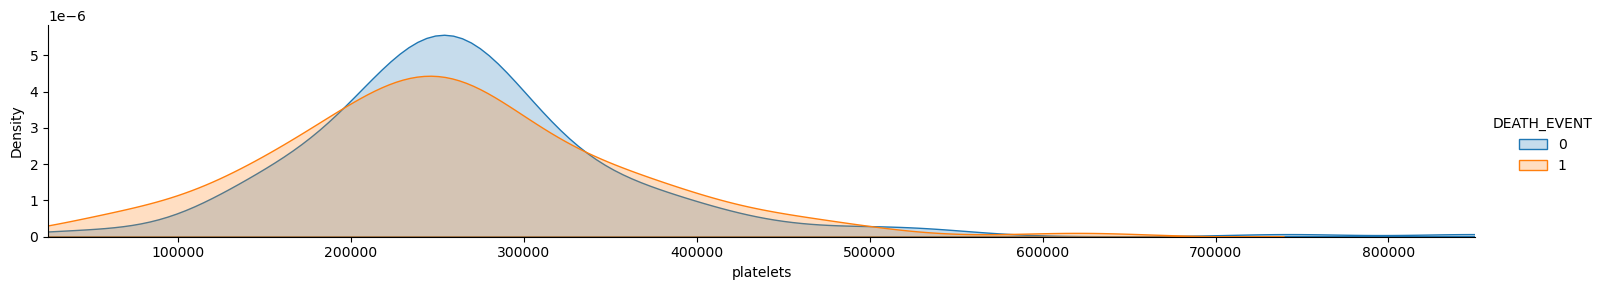

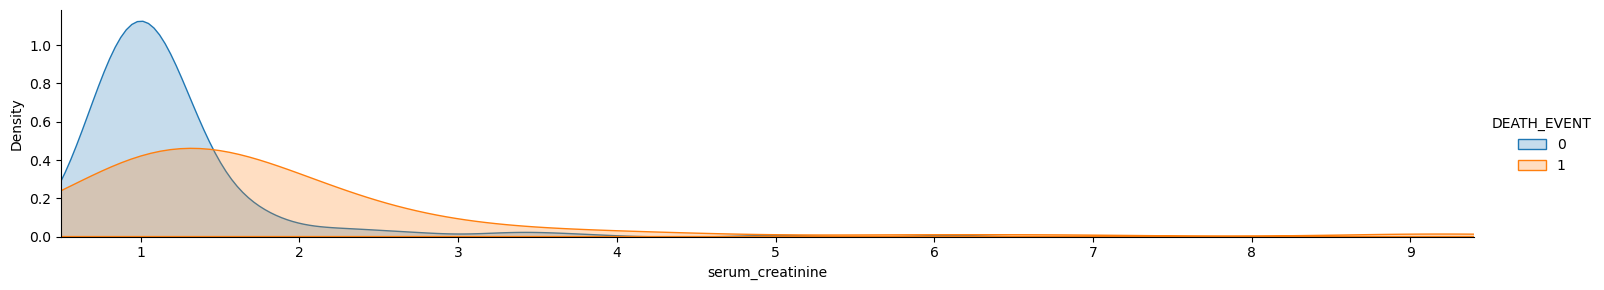

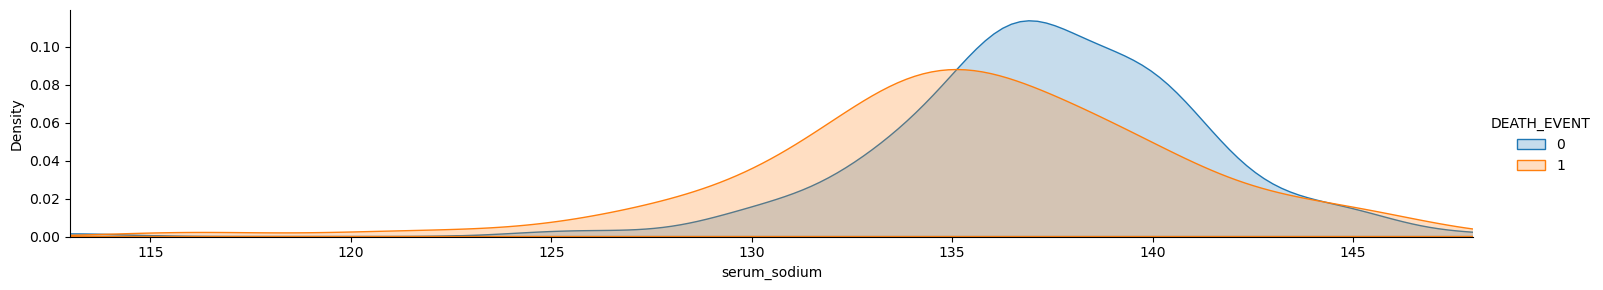

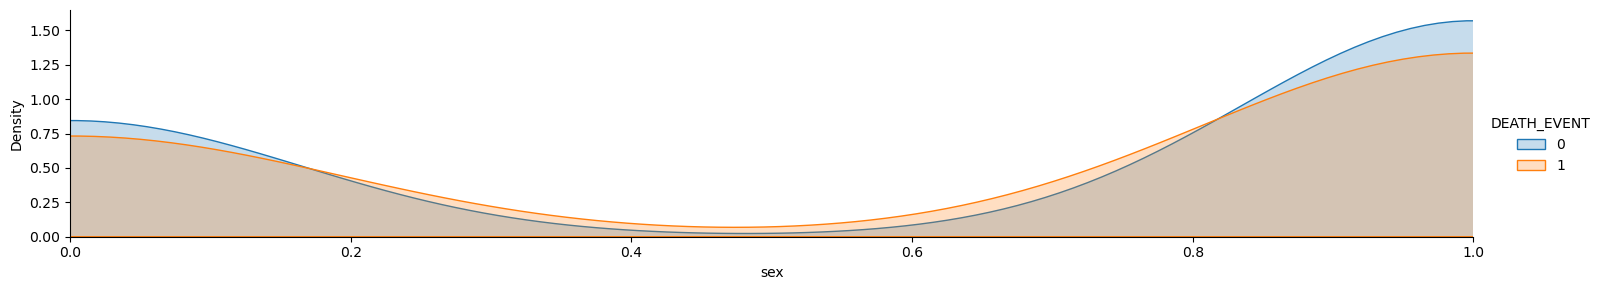

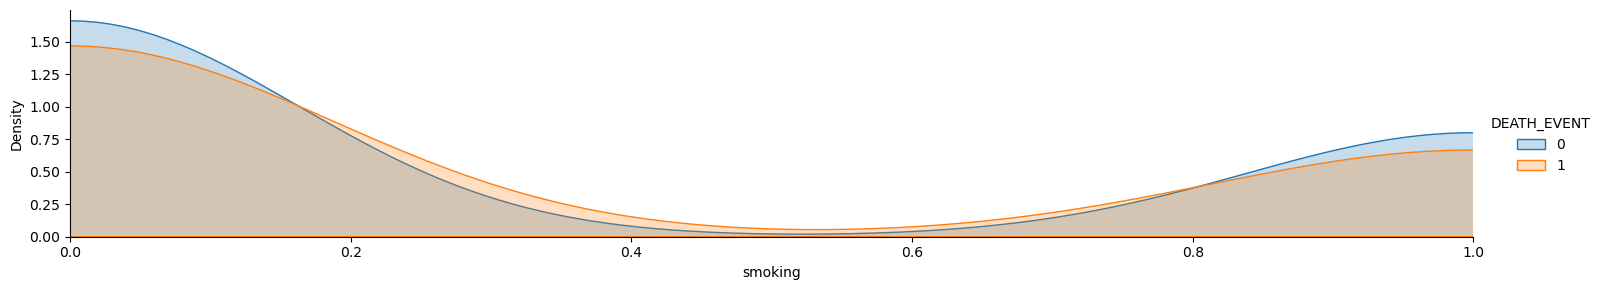

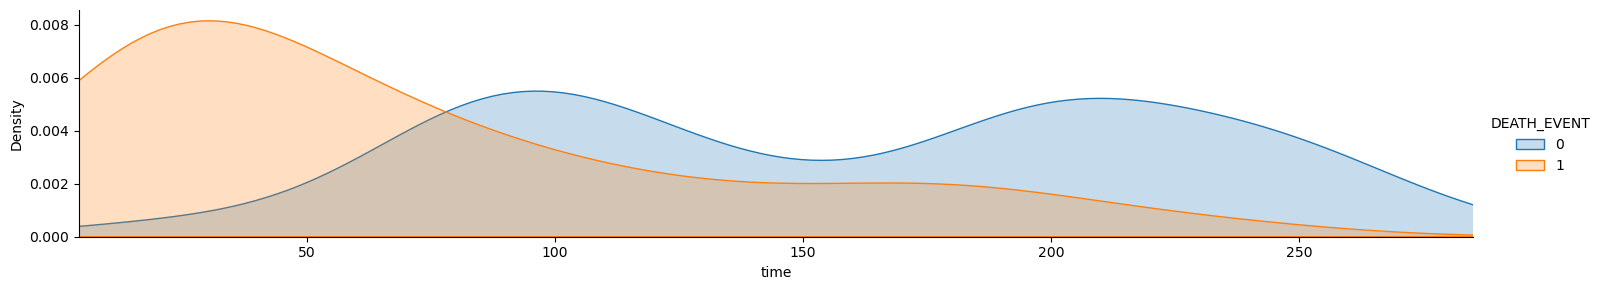

In [16]:
def facet(feature):
    facet = sns.FacetGrid(data, hue="DEATH_EVENT", aspect=5)
    facet.map(sns.kdeplot, feature, shade = True)
    facet.set(xlim=(  data[feature].min(),  data[feature].max()  ))
    facet.add_legend()
    plt.show()

for i in data.iloc[:, :-1]:
    facet(i)

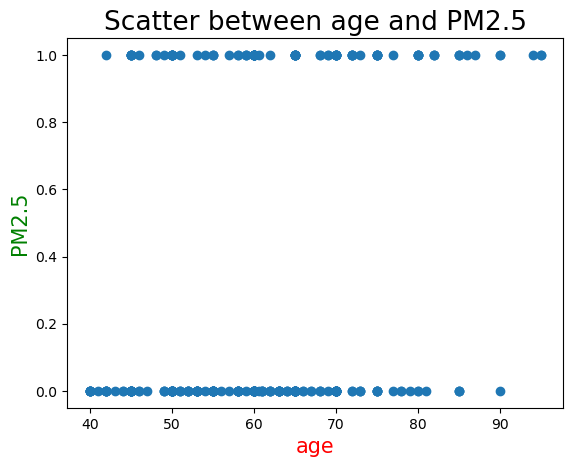

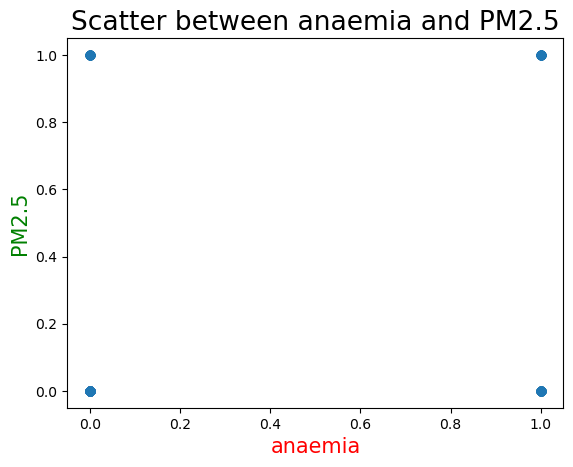

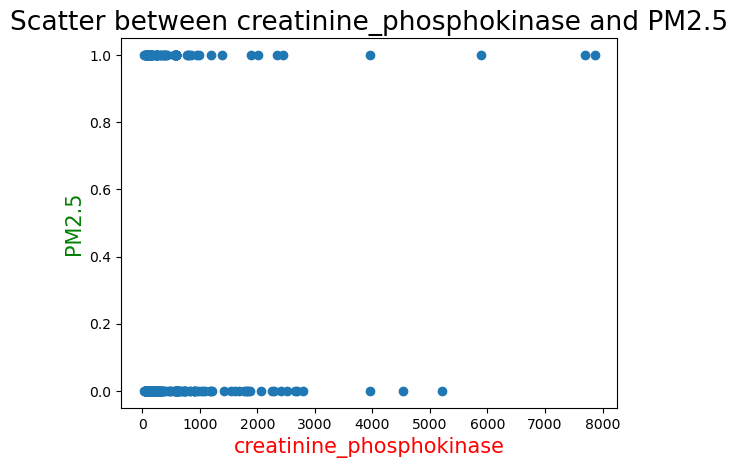

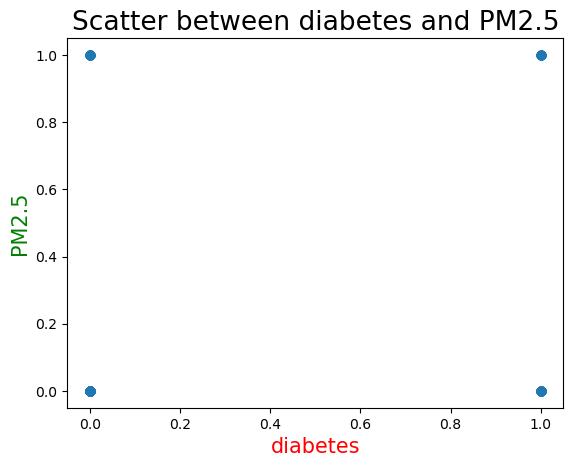

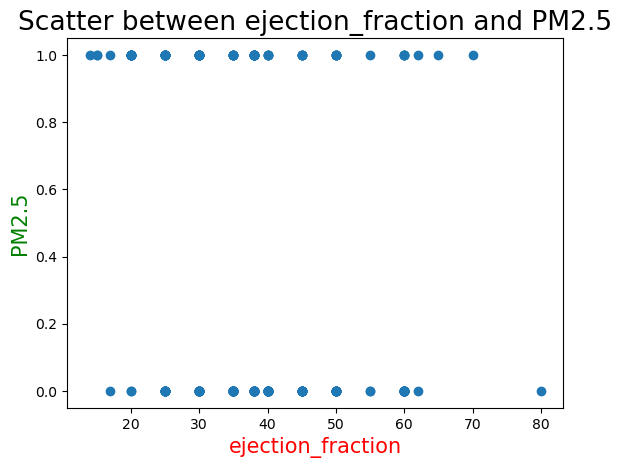

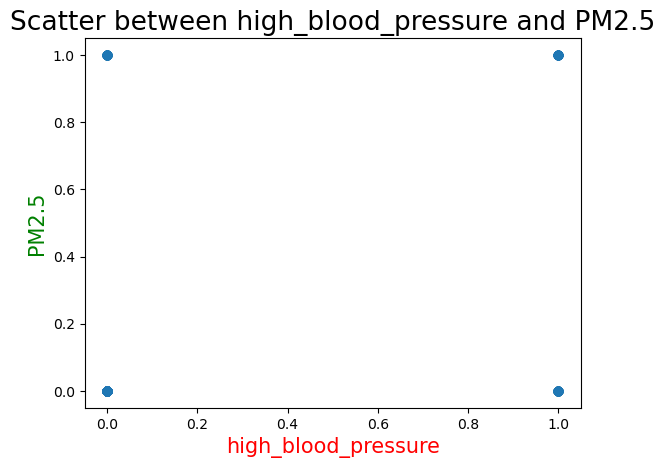

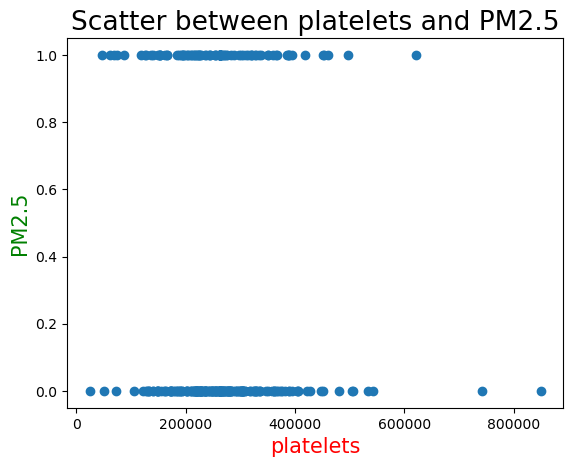

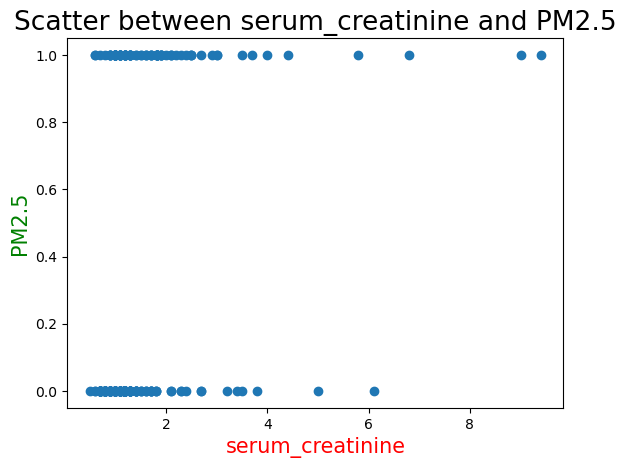

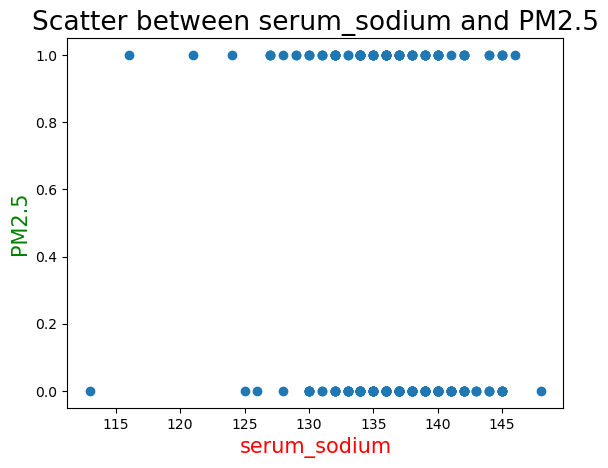

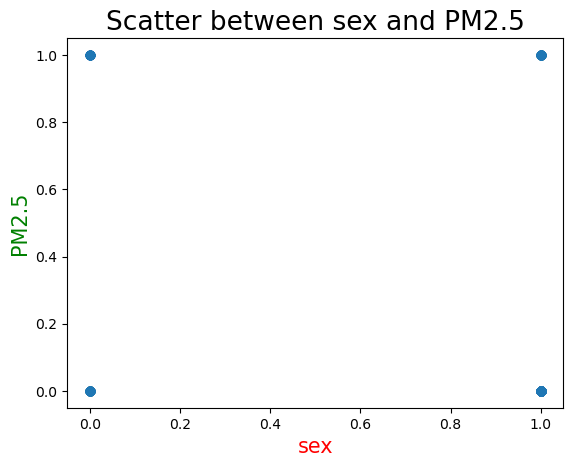

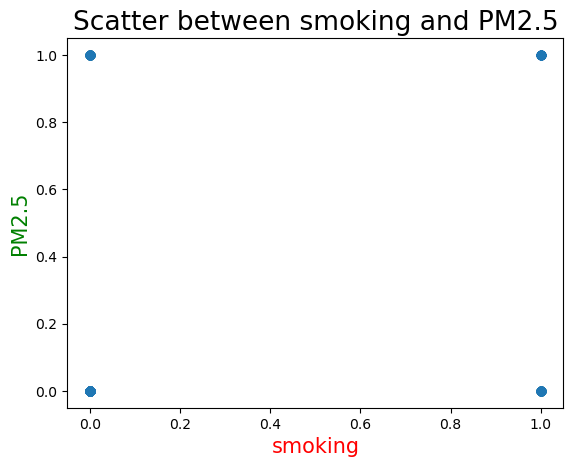

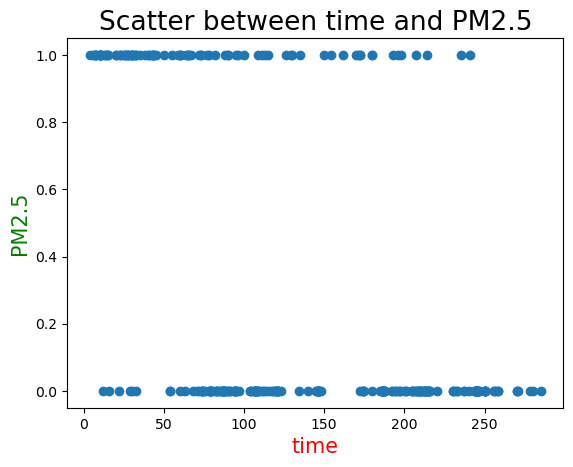

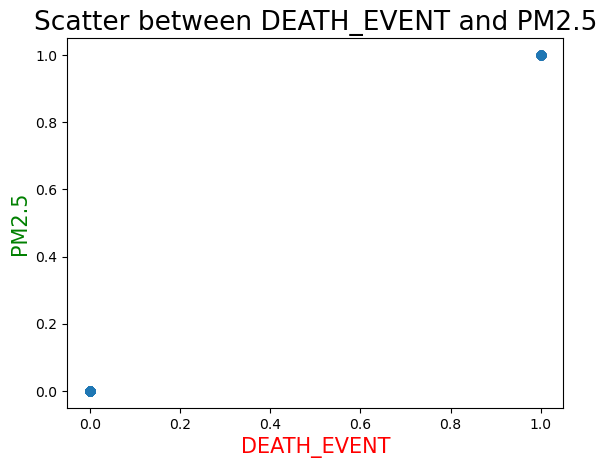

In [17]:
def scatter(feature):
    plt.scatter(x=data[feature],y=data["DEATH_EVENT"])
    plt.title(f"Scatter between {feature} and PM2.5",c="k",fontsize=19)
    plt.xlabel(feature,fontsize=15,c="r")
    plt.ylabel("PM2.5",fontsize=15,c="g")
    plt.show()

for i in data:
    scatter(i)

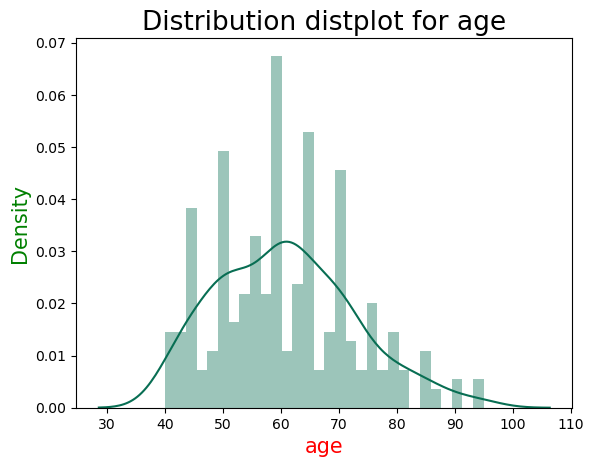

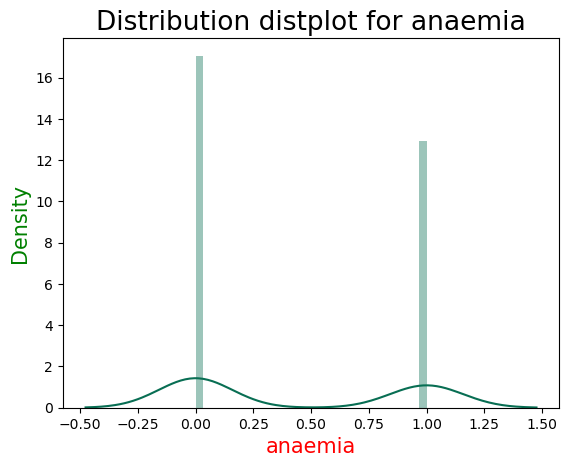

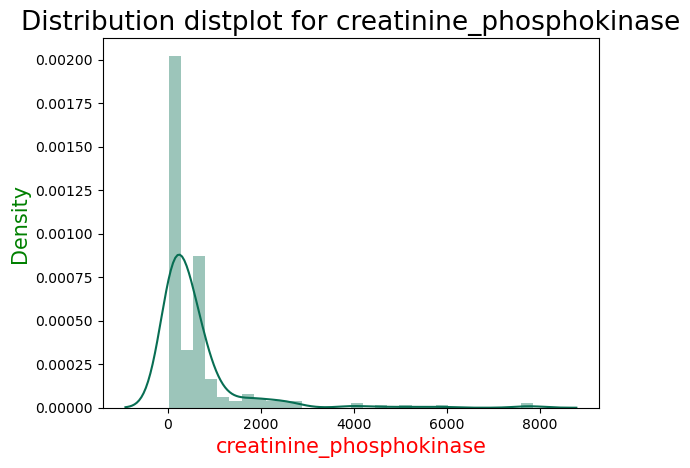

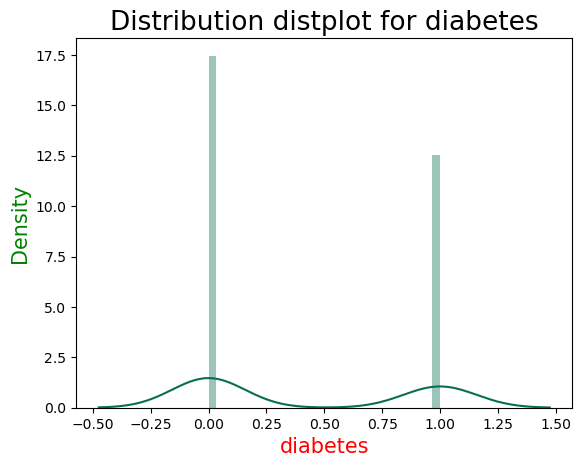

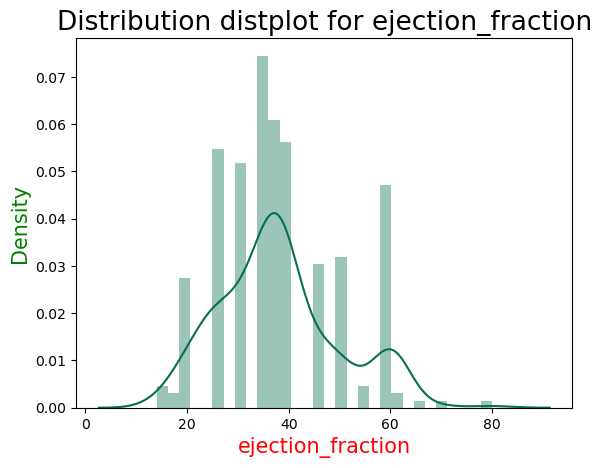

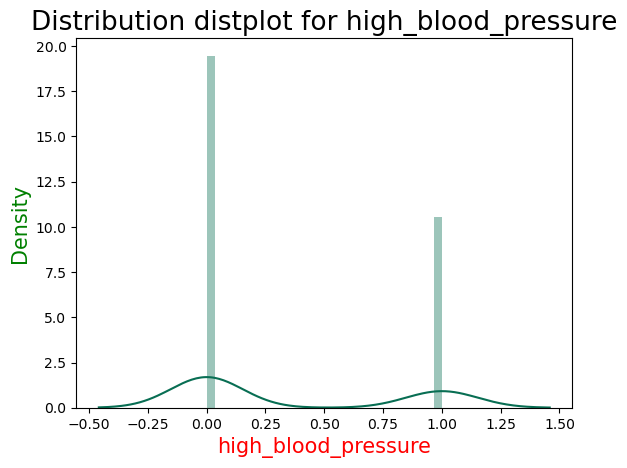

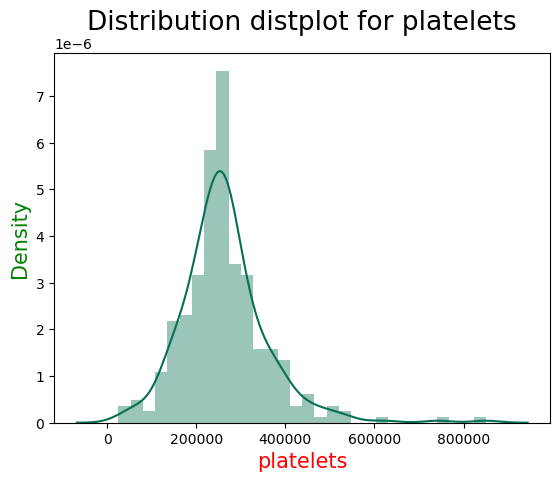

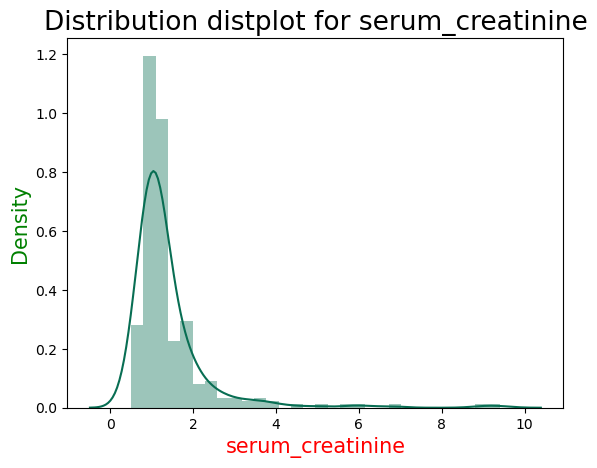

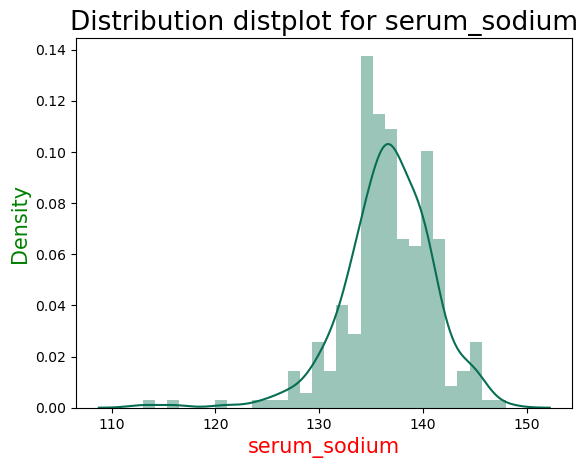

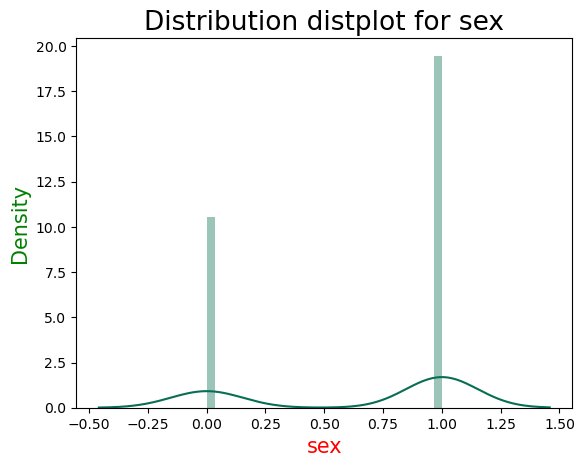

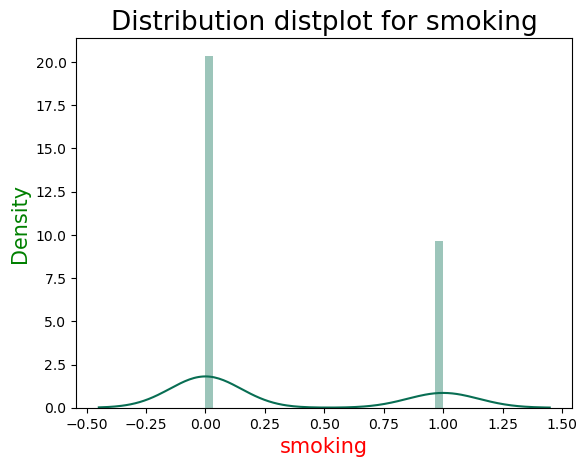

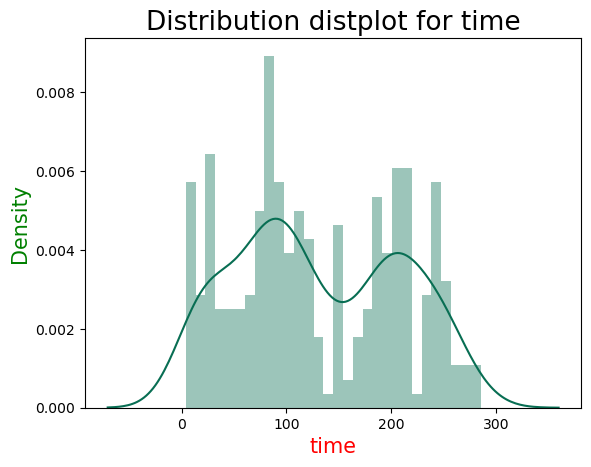

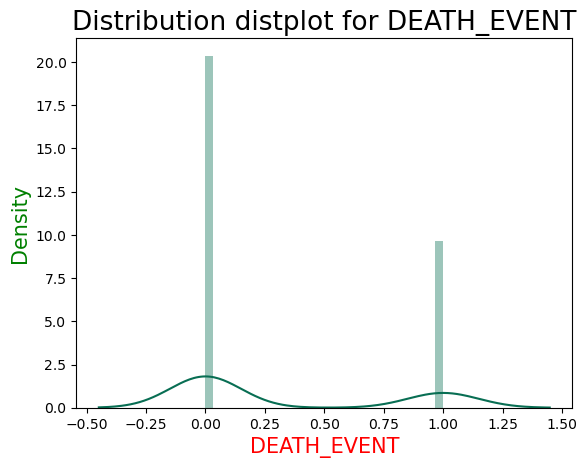

In [18]:
def distplot(feature):
    sns.distplot(x=data[feature],bins=30, color="#086e53")
    plt.title(f"Distribution distplot for {feature}",c="k",fontsize=19)
    plt.xlabel(feature,fontsize=15,c="r")
    plt.ylabel("Density",fontsize=15,c="g")
    plt.show()
    
for i in data:
    distplot(i)

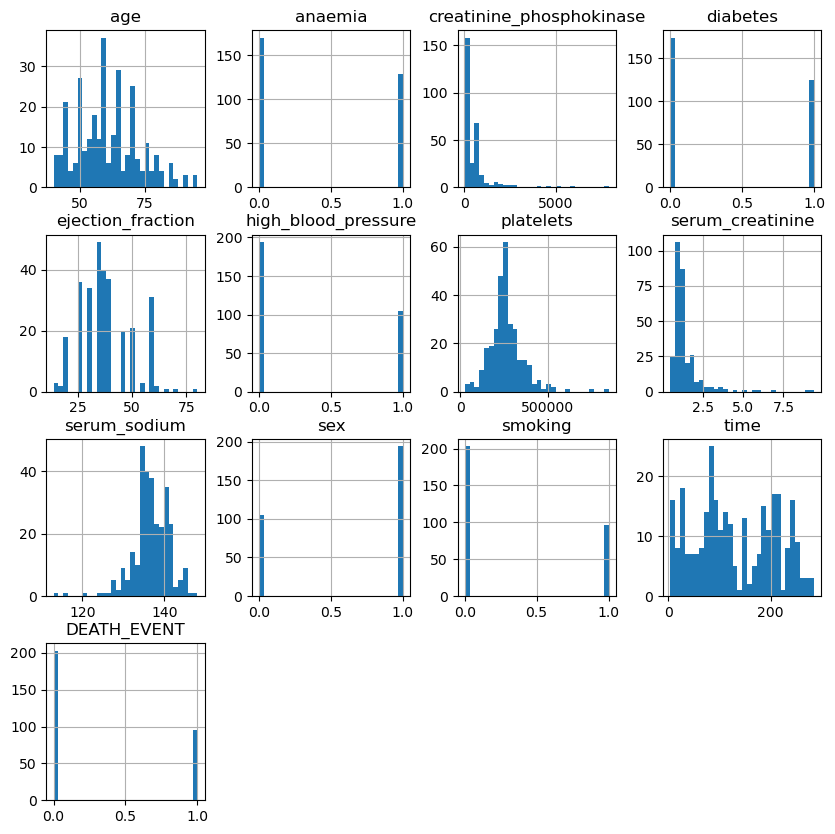

In [19]:
data.hist(bins=30,figsize=(10,10))
plt.show()

In [20]:
def histogram(feature):
    plt.figure(figsize=(5,5))
    fig=px.histogram(data,x=feature,color=feature)
    fig.show()

for i in data:
    histogram(i)

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

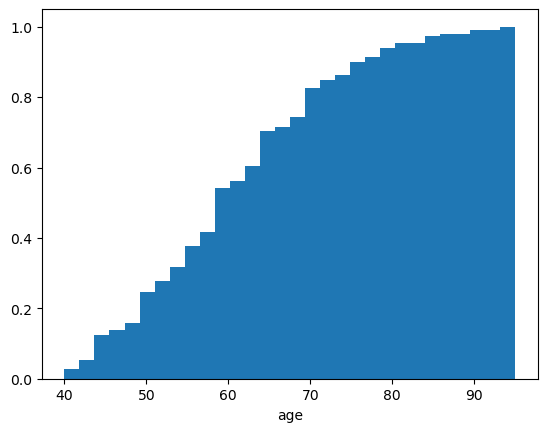

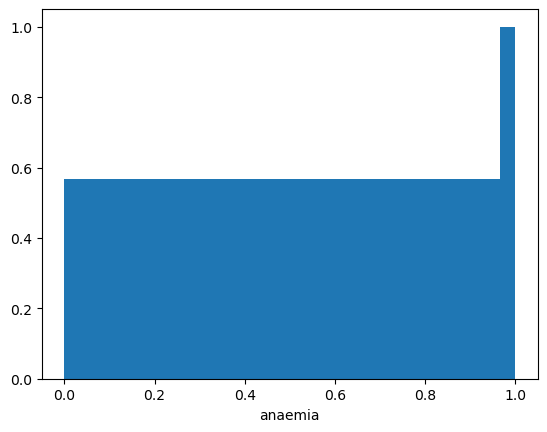

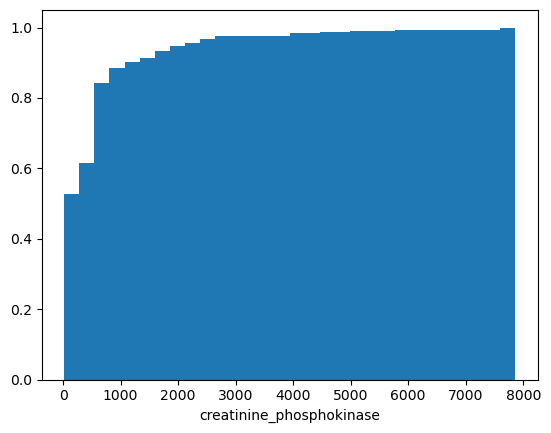

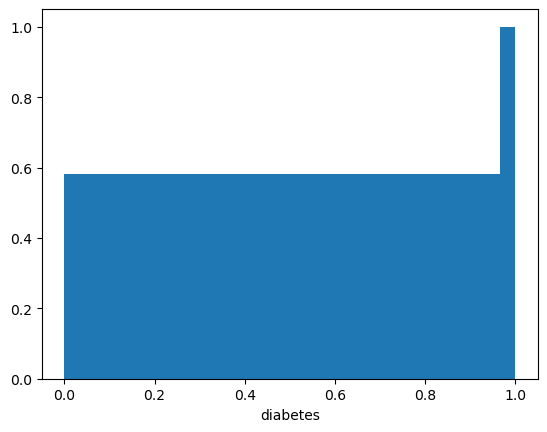

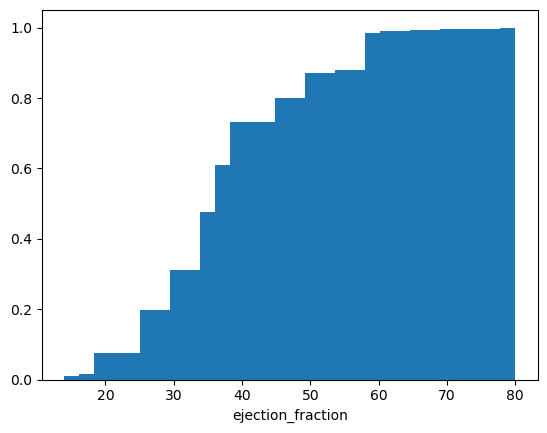

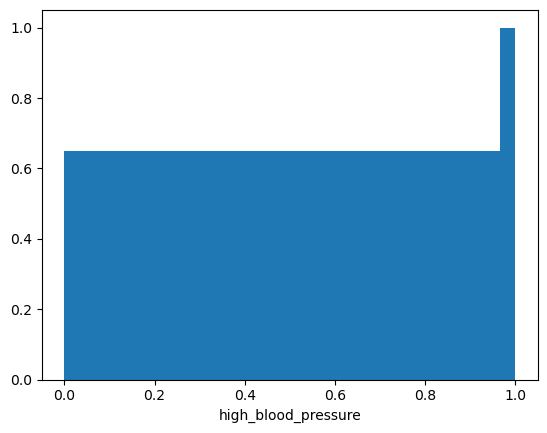

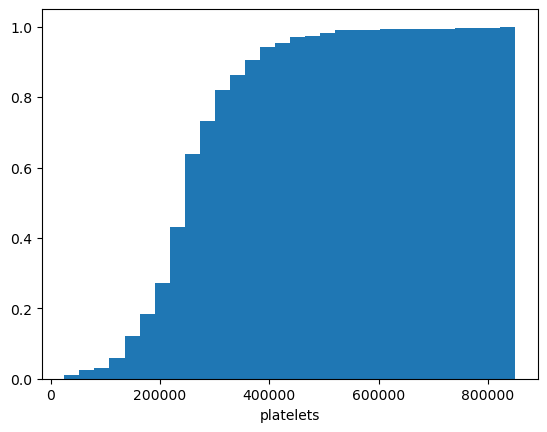

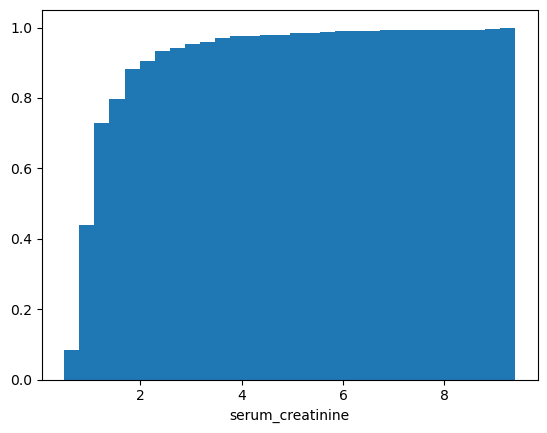

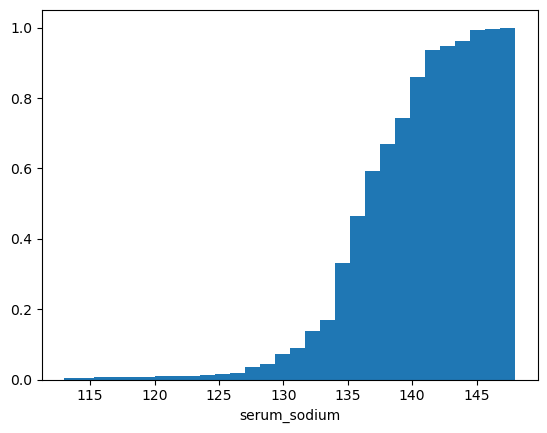

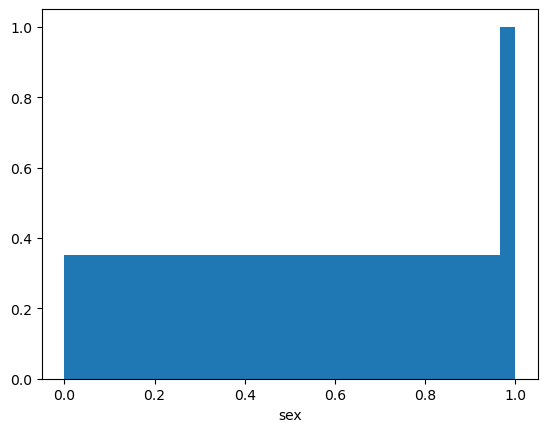

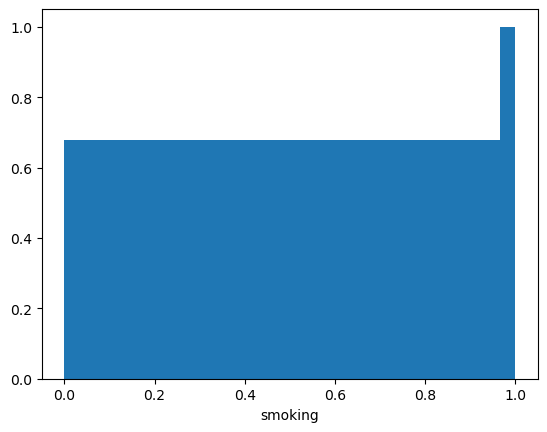

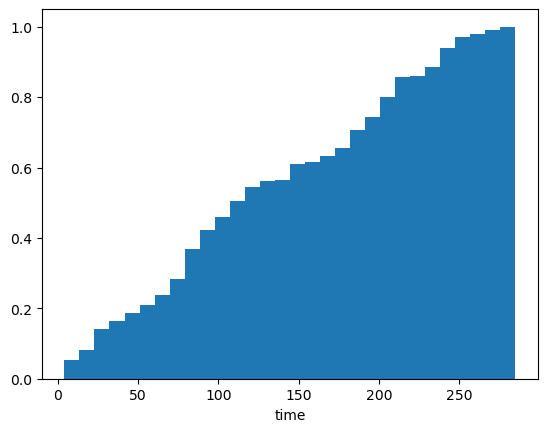

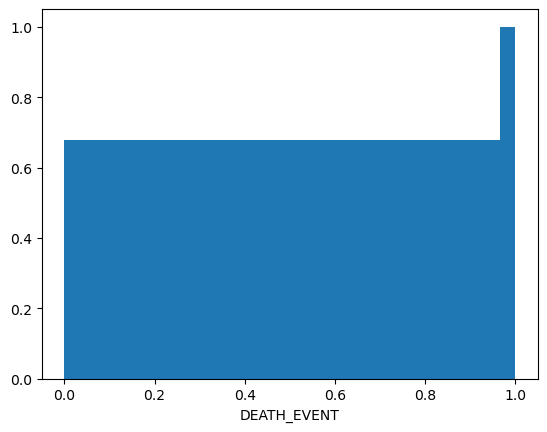

In [21]:
def hist(feature):
    plt.hist(data[feature],bins=30,cumulative=True,density=True)
    plt.xlabel(feature)
    plt.show()

for i in data:
    hist(i)

In [22]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [23]:
corr=data.corr(numeric_only=True)
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


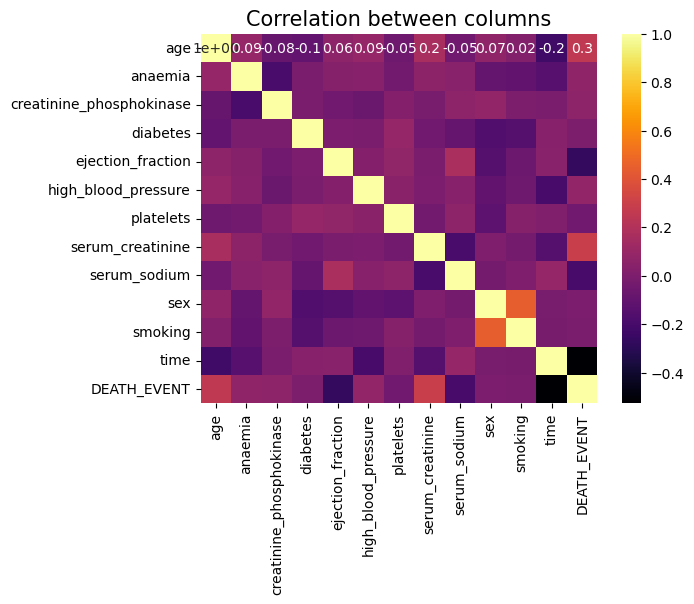

In [24]:
sns.heatmap(corr, annot=True, fmt=".1", cmap="inferno")
plt.title("Correlation between columns",fontsize=15,c="k")
plt.show()

In [25]:
for col in data:
    print(f"minimum of {col} is {data[col].min()} and maximum is {data[col].max()}\n")

minimum of age is 40.0 and maximum is 95.0

minimum of anaemia is 0 and maximum is 1

minimum of creatinine_phosphokinase is 23 and maximum is 7861

minimum of diabetes is 0 and maximum is 1

minimum of ejection_fraction is 14 and maximum is 80

minimum of high_blood_pressure is 0 and maximum is 1

minimum of platelets is 25100.0 and maximum is 850000.0

minimum of serum_creatinine is 0.5 and maximum is 9.4

minimum of serum_sodium is 113 and maximum is 148

minimum of sex is 0 and maximum is 1

minimum of smoking is 0 and maximum is 1

minimum of time is 4 and maximum is 285

minimum of DEATH_EVENT is 0 and maximum is 1



# categorized some feature into groups

In [26]:
df = [data]

In [27]:
# Age  40 ---> 95
for pointer in df:
    pointer.loc[ pointer['age'] <= 50, 'age'] = 0
    pointer.loc[(pointer['age'] > 50) & (pointer['age'] <= 70), 'age'] = 1
    pointer.loc[(pointer['age'] > 70) & (pointer['age'] <= 80), 'age'] = 2
    pointer.loc[ pointer['age'] > 80, 'age'] = 3

In [28]:
# creatinine_phosphokinase  23 ---> 7861
for pointer in df:
    pointer.loc[ pointer['creatinine_phosphokinase'] <= 150, 'creatinine_phosphokinase'] = 0
    pointer.loc[(pointer['creatinine_phosphokinase'] > 150) & (pointer['creatinine_phosphokinase'] <= 1000), 'creatinine_phosphokinase'] = 1
    pointer.loc[(pointer['creatinine_phosphokinase'] > 1000) & (pointer['creatinine_phosphokinase'] <= 3500), 'creatinine_phosphokinase'] = 2
    pointer.loc[(pointer['creatinine_phosphokinase'] > 3500) & (pointer['creatinine_phosphokinase'] <= 6500), 'creatinine_phosphokinase'] = 3
    pointer.loc[ pointer['creatinine_phosphokinase'] > 6500, 'creatinine_phosphokinase'] = 4

In [29]:
# ejection_fraction  14 ---> 80
for pointer in df:
    pointer.loc[ pointer['ejection_fraction'] <= 30, 'ejection_fraction'] = 0
    pointer.loc[(pointer['ejection_fraction'] > 30) & (pointer['ejection_fraction'] <= 50), 'ejection_fraction'] = 1
    pointer.loc[(pointer['ejection_fraction'] > 50) & (pointer['ejection_fraction'] <= 60), 'ejection_fraction'] = 2
    pointer.loc[ pointer['ejection_fraction'] > 60, 'ejection_fraction'] = 3

In [30]:
# platelets  25100.0 ---> 850000.0
for pointer in df:
    pointer.loc[ pointer['platelets'] <= 100000.00, 'platelets'] = 0
    pointer.loc[(pointer['platelets'] > 100000.00) & (pointer['platelets'] <= 350000.00), 'platelets'] = 1
    pointer.loc[(pointer['platelets'] > 350000.00) & (pointer['platelets'] <= 550000.00), 'platelets'] = 2
    pointer.loc[(pointer['platelets'] > 550000.00) & (pointer['platelets'] <= 750000.00), 'platelets'] = 3
    pointer.loc[ pointer['platelets'] > 750000.00, 'platelets'] = 4

In [31]:
# serum_sodium   113  ---> 148
for pointer in df:
    pointer.loc[ pointer['serum_sodium'] <= 120, 'serum_sodium'] = 0
    pointer.loc[(pointer['serum_sodium'] > 120) & (pointer['serum_sodium'] <= 130), 'serum_sodium'] = 1
    pointer.loc[ pointer['serum_sodium'] > 130, 'serum_sodium'] = 2

In [32]:
# time  4 ---> 285
for pointer in df:
    pointer.loc[ pointer['time'] <= 50, 'time'] = 0
    pointer.loc[(pointer['time'] > 50) & (pointer['time'] <= 80), 'time'] = 1
    pointer.loc[(pointer['time'] > 80) & (pointer['time'] <= 150), 'time'] = 2
    pointer.loc[(pointer['time'] > 150) & (pointer['time'] <= 200), 'time'] = 3
    pointer.loc[ pointer['time'] > 200, 'time'] = 4

In [33]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,2.0,0,1,0,0,1,1.0,1.9,1,1,0,0,1
1,1.0,0,4,0,1,0,1.0,1.1,2,1,0,0,1
2,1.0,0,0,0,0,0,1.0,1.3,1,1,1,0,1
3,0.0,1,0,0,0,0,1.0,1.9,2,1,0,0,1
4,1.0,1,1,1,0,0,1.0,2.7,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0,0,1,1,1,1.0,1.1,2,1,1,4,0
295,1.0,0,2,0,1,0,1.0,1.2,2,0,0,4,0
296,0.0,0,2,1,2,0,3.0,0.8,2,0,0,4,0
297,0.0,0,2,0,1,0,1.0,1.4,2,1,1,4,0


In [34]:
for col in data:
    print(f"{col} has {data[col].unique()}\n")

age has [2. 1. 0. 3.]

anaemia has [0 1]

creatinine_phosphokinase has [1 4 0 2 3]

diabetes has [0 1]

ejection_fraction has [0 1 2 3]

high_blood_pressure has [1 0]

platelets has [1. 2. 0. 3. 4.]

serum_creatinine has [1.9  1.1  1.3  2.7  2.1  1.2  1.5  9.4  4.   0.9  1.   0.8  1.6  1.83
 5.8  3.   3.5  2.3  0.6  4.4  1.4  6.8  2.2  2.   1.18 2.9  0.7  1.7
 2.5  1.8  3.2  0.75 3.7  3.4  6.1  2.4  9.   5.   0.5  3.8 ]

serum_sodium has [1 2 0]

sex has [1 0]

smoking has [0 1]

time has [0 1 2 3 4]

DEATH_EVENT has [1 0]



# models

In [35]:
data_train = data.drop("DEATH_EVENT",axis=1)
target = data["DEATH_EVENT"]
data_train.shape, target.shape

((299, 12), (299,))

In [36]:
data_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,2.0,0,1,0,0,1,1.0,1.9,1,1,0,0
1,1.0,0,4,0,1,0,1.0,1.1,2,1,0,0
2,1.0,0,0,0,0,0,1.0,1.3,1,1,1,0
3,0.0,1,0,0,0,0,1.0,1.9,2,1,0,0
4,1.0,1,1,1,0,0,1.0,2.7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0,0,1,1,1,1.0,1.1,2,1,1,4
295,1.0,0,2,0,1,0,1.0,1.2,2,0,0,4
296,0.0,0,2,1,2,0,3.0,0.8,2,0,0,4
297,0.0,0,2,0,1,0,1.0,1.4,2,1,1,4


In [37]:
target

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# KFold

In [38]:
k_fold = KFold(n_splits= 5, shuffle=True, random_state=42)

# KNN

In [58]:
clf = KNeighborsClassifier(n_neighbors = 50)
scoring = 'accuracy'

score = cross_val_score(clf, data_train, target, cv=k_fold, n_jobs=-1, scoring=scoring)

print(score)

[0.66666667 0.75       0.91666667 0.86666667 0.86440678]


In [59]:
round(np.mean(score)*100, 2)

81.29

# Decision Tree

In [119]:
clf2 = DecisionTreeClassifier(criterion = "entropy",max_depth=3 ,random_state= 42)
scoring = 'accuracy'
score = cross_val_score(clf2, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.83333333 0.91666667 0.88333333 0.88135593]


In [120]:
round(np.mean(score)*100, 2)

84.29

# Random Forest

In [149]:
clf3 = RandomForestClassifier(n_estimators=160 , criterion = "log_loss" , max_depth= 8 ,random_state= 0)
scoring = 'accuracy'
score = cross_val_score(clf3, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.71666667 0.88333333 0.85       0.9        0.86440678]


In [150]:
round(np.mean(score)*100, 2)

84.29

# Naive Bayes

In [183]:
clf4 = GaussianNB(var_smoothing=3)
scoring = 'accuracy'
score = cross_val_score(clf4, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.6        0.58333333 0.78333333 0.75       0.76271186]


In [184]:
round(np.mean(score)*100, 2)

69.59

# GradientBoostingClassifier

In [229]:
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, random_state=42, max_features=2, max_depth=2)
scoring = 'accuracy'
score = cross_val_score(gbc, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.86666667 0.88333333 0.91666667 0.86440678]


In [230]:
round(np.mean(score)*100,2)

85.95

# SVM

In [276]:
clf5 = SVC( kernel="poly", random_state= 0 , probability=True)
scoring = 'accuracy'
score = cross_val_score(clf5, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78333333 0.83333333 0.86666667 0.93333333 0.84745763]


In [277]:
round(np.mean(score)*100,2)

85.28

# AdaBoostClassifier

In [304]:
clf6 = AdaBoostClassifier(n_estimators=100, learning_rate=0.02)
scoring = 'accuracy'
score = cross_val_score(clf6, data_train, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

[0.73333333 0.78333333 0.91666667 0.88333333 0.86440678]


In [305]:
round(np.mean(score)*100,2)

83.62

# XGBClassifier

In [343]:
clf7 = XGBClassifier(max_depth = 5 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 )
scoring = 'accuracy'
score = cross_val_score(clf7, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78333333 0.85       0.86666667 0.88333333 0.91525424]


In [344]:
round(np.mean(score)*100, 2)

85.97

# Voting

In [345]:
clf8 = XGBClassifier(max_depth = 5 , learning_rate = 0.02 ,n_estimators= 50, random_state=42 )
clf9 = SVC( kernel="poly", random_state= 0 , probability=True)
clf10 = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, random_state=42, max_features=2, max_depth=2)
clf11 = RandomForestClassifier(n_estimators=160 , criterion = "log_loss" , max_depth= 8 ,random_state= 0)

In [346]:
v_clf55 = VotingClassifier(estimators=[("XGBClassifier" , clf8) , ('SVC' , clf9) ,
                                     ("GradientBoostingClassifier" , clf10) ,("RandomForestClassifier" , clf11)] , voting = "hard")

scoring = 'accuracy'
score = cross_val_score(v_clf55, data_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78333333 0.86666667 0.85       0.9        0.89830508]


In [347]:
round(np.mean(score)*100, 2)

85.97

# train test split

In [349]:
x = data.drop("DEATH_EVENT",axis=1)
y = data['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

In [351]:
x_train.shape,  x_test.shape,  y_train.shape,  y_test.shape

((119, 12), (180, 12), (119,), (180,))

# LogisticRegression

In [352]:
LogR = LogisticRegression(random_state = 42)

In [353]:
LogR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [354]:
y_pred = LogR.predict(x_test)

In [355]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[112   4]
 [ 24  40]]
84.44444444444444


In [356]:
print(LogR.score(x_test , y_test)*100)

84.44444444444444


# KNN

In [386]:
knn = KNeighborsClassifier(n_neighbors = 50)

In [387]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [388]:
y_pred = knn.predict(x_test)

In [389]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[116   0]
 [ 63   1]]
65.0


In [390]:
print(knn.score(x_test , y_test)*100)

65.0


# SVM

In [391]:
svm1 = SVC( kernel="poly", random_state= 0 , probability=True)
svm1.fit(x_train, y_train)

SVC(kernel='poly', probability=True, random_state=0)

In [392]:
y_pred = svm1.predict(x_test)

In [393]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[104  12]
 [ 23  41]]
80.55555555555556


In [394]:
print(svm1.score(x_test , y_test)*100)

80.55555555555556


# DecisionTreeClassifier

In [452]:
Dtc = DecisionTreeClassifier(criterion = "entropy",max_depth=2 ,random_state= 42)
Dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [453]:
y_pred = Dtc.predict(x_test)

In [454]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[104  12]
 [ 26  38]]
78.88888888888889


# Random Forest

In [479]:
Rf = RandomForestClassifier(n_estimators=150 , criterion = "entropy" , max_depth= 10 ,random_state= 0)
Rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150,
                       random_state=0)

In [480]:
y_pred = Rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[107   9]
 [ 29  35]]
78.88888888888889


In [481]:
print(Rf.score(x_test , y_test)*100)

78.88888888888889


# XGBOOST

In [516]:
xgb = XGBClassifier(max_depth = 4 , learning_rate = 0.03 ,n_estimators= 200, random_state=42 )
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [517]:
y_pred = xgb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[105  11]
 [ 22  42]]
81.66666666666667


In [518]:
print(xgb.score(x_test , y_test)*100)

81.66666666666667


# GradientBoostingClassifier

In [561]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, random_state=42, max_features=3, max_depth=2)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features=3,
                           n_estimators=200, random_state=42)

In [562]:
y_pred = gbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[109   7]
 [ 29  35]]
80.0


In [563]:
print(gbc.score(x_test , y_test)*100)

80.0


# AdaBoostClassifier

In [606]:
ada = AdaBoostClassifier(n_estimators=150, learning_rate=0.002)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=150)

In [607]:
y_pred = ada.predict(x_test)

In [608]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[114   2]
 [ 35  29]]
79.44444444444444


In [609]:
print(ada.score(x_test , y_test)*100)

79.44444444444444


# Voting

In [610]:
clf1 = DecisionTreeClassifier(criterion = "log_loss" ,max_depth=9 ,random_state= 42)
clf2 = XGBClassifier(max_depth = 4 , learning_rate = 0.03 ,n_estimators= 200, random_state=42 )
clf3 = SVC( kernel="poly", random_state= 0 , probability=True)
clf4 = LogisticRegression(random_state = 42)

In [614]:
v_clf = VotingClassifier(estimators=[("DecisionTreeClassifier" , clf1) , ('XGBClassifier' , clf2) ,
                                     ("SVC" , clf3) ,("LogisticRegression" , clf4)] , voting = "hard")

In [615]:
v_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='log_loss',
                                                     max_depth=9,
                                                     random_state=42)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('SVC',
                              SVC(kernel='poly', probability=True,
                                  random_state=0)),
                             ('LogisticRegression',
                              LogisticRegression(random_state=42))])

In [616]:
y_pred = v_clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred)*100)

[[108   8]
 [ 26  38]]
81.11111111111111


# Testing

In [618]:

testing = LogisticRegression(random_state = 42)

model = testing.fit(data_train, target)

test_data = data.drop("DEATH_EVENT", axis=1).copy()
prediction = testing.predict(test_data)


In [619]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [620]:
submission = data.join(pd.DataFrame(model.predict(test_data),columns=["predicted"]))[["DEATH_EVENT","predicted"]]
submission.to_csv('death_event_submisstion.csv', index=False)


In [621]:
submission

,DEATH_EVENT,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
294,0,0
295,0,0
296,0,0
297,0,0


In [641]:
count = 0
for actual, predicted in zip(submission["DEATH_EVENT"], submission["predicted"]):
    if actual == predicted:
        count += 1
print(f"Total predictions is {submission.index.stop}\n The number of Correct predictions is {count}\n The number of wrong predictions is {299-count}")


Total predictions is 299
 The number of Correct predictions is 259
 The number of wrong predictions is 40
